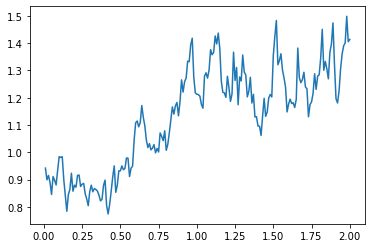

In [16]:
import pychastic
#TF_CPP_MIN_LOG_LEVEL=2
problem = pychastic.sde_problem.SDEProblem(lambda x: 0.2*x,lambda x: 0.5*x,1.0,2.0)
solver = pychastic.sde_solver.SDESolver()
trajectory = solver.solve(problem)

import matplotlib.pyplot as plt
plt.plot(trajectory['time_values'],trajectory['solution_values'])
plt.show()

In [3]:
# https://pychastic.readthedocs.io/en/latest/moleculardynamics.html
'''The SDEProblem constructor takes two callables (functions) as arguments. First one describes the drift term, second one describes the noise term. '''

import pychastic
import jax.numpy as np #to make jit acceleration possible
g = 2.0 # units are [k_b T / sphere size]
problem = pychastic.sde_problem.SDEProblem(
    lambda x: (1.0 / x**2) - (1.0-1.0/x)*g,
    lambda x: np.sqrt(2.0*(1.0-1.0/x)),
    1.5,
    50.0
    )
solver = pychastic.sde_solver.SDESolver()
trajectory = solver.solve(problem)
trajectory

{'solution_values': Array([[1.2655594],
        [1.2033639],
        [1.1445117],
        ...,
        [      nan],
        [      nan],
        [      nan]], dtype=float32),
 'time_values': Array([9.9999998e-03, 2.0000000e-02, 2.9999999e-02, ..., 4.9977619e+01,
        4.9987617e+01, 4.9997616e+01], dtype=float32, weak_type=True),
 'wiener_values': Array([[-0.28440824],
        [-0.38357523],
        [-0.49086982],
        ...,
        [ 5.9058704 ],
        [ 5.740689  ],
        [ 5.8392158 ]], dtype=float32)}

In [ ]:

import matplotlib.pyplot as plt
plt.plot(trajectory['time_values'],trajectory['solution_values'])
plt.show()







/opt/conda/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6611: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/opt/conda/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6612: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


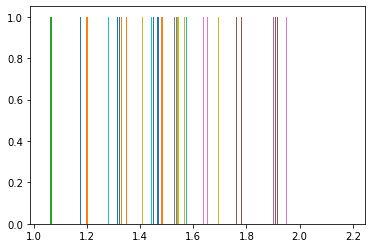

In [8]:
# simulating many trajectories 

import pychastic
import jax.numpy as np
g = 2.0
problem = pychastic.sde_problem.SDEProblem(
    lambda x: (1.0 / x**2) - (1.0-1.0/x)*g,
    lambda x: np.sqrt(2.0*(1.0-1.0/x)),
    x0=1.5,
    tmax=0.1
    )
solver = pychastic.sde_solver.SDESolver(dt = 0.001)
trajectories = solver.solve_many(problem,500)

plt.hist(trajectories['solution_values'][:,-1].flatten())
plt.show()

In [9]:
trajectories['solution_values'].shape  # (trajectory, timestep, dimension?)


(500, 100, 1)

In [11]:
trajectories['time_values'].shape # (trajectory, timestep)

(500, 100)

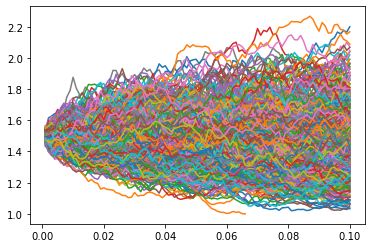

In [12]:
for (t,x) in zip(trajectories['time_values'],trajectories['solution_values']):
    plt.plot(t,x)

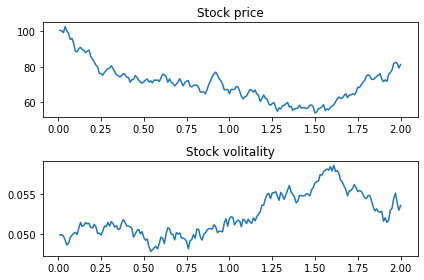

In [2]:
# Multiple dimensions

import pychastic
import jax.numpy as jnp
theta = 0.1; omega = 0.05; xi = 0.1; mu = 0.01

problem = pychastic.sde_problem.SDEProblem(
      lambda x: jnp.array([mu, theta*(omega - x[1])]),
      lambda x: jnp.array([[jnp.sqrt(x[1])*x[0],0],[0,xi * x[1]]]),
      x0 = jnp.array([100.0,0.05]),
      tmax = 2.0
      )
solver = pychastic.sde_solver.SDESolver()
trajectory = solver.solve(problem)

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
axs[0].plot(trajectory['time_values'],trajectory['solution_values'][:,0])
axs[1].plot(trajectory['time_values'],trajectory['solution_values'][:,1])
axs[0].set_title('Stock price')
axs[1].set_title('Stock volitality')
plt.tight_layout()
plt.show()